# How many clusters of grain?

This exercise is taken and modified from https://github.com/benjaminwilson/python-clustering-exercises

This is a class to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).


**Step 1:** Load the dataset _(written for you)_.

In [33]:
import pandas as pd

seeds_df = pd.read_csv('../Data/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [34]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [35]:
seeds_df.shape

(210, 7)

**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [36]:
dataset = seeds_df.values
X = dataset[:,0:6].astype(float)
Y = dataset[:,6]

In [37]:
Y

array([5.22 , 4.956, 4.825, 4.805, 5.175, 4.956, 5.219, 5.   , 5.877,
       5.533, 5.314, 5.001, 4.738, 4.872, 4.825, 4.781, 4.781, 5.046,
       4.649, 4.914, 5.176, 5.219, 5.091, 4.961, 5.001, 5.307, 4.825,
       4.869, 5.038, 5.097, 5.056, 5.228, 5.299, 5.012, 5.36 , 5.443,
       5.527, 5.484, 5.309, 5.001, 5.178, 5.176, 4.783, 5.528, 5.18 ,
       4.961, 5.132, 5.175, 5.111, 5.351, 5.144, 5.136, 5.396, 5.224,
       5.487, 5.439, 5.044, 5.088, 5.222, 4.519, 4.607, 4.703, 4.605,
       5.088, 4.782, 4.607, 5.15 , 5.132, 5.3  , 5.067, 6.06 , 5.877,
       5.791, 6.079, 5.841, 5.795, 5.922, 6.451, 6.362, 5.746, 5.88 ,
       5.879, 6.187, 6.273, 6.185, 6.197, 6.109, 6.498, 6.231, 6.321,
       6.449, 6.053, 6.053, 5.877, 6.448, 5.967, 6.238, 6.453, 6.273,
       6.097, 5.618, 5.837, 6.009, 6.229, 6.148, 5.879, 6.2  , 5.929,
       6.55 , 5.894, 5.794, 5.965, 5.924, 6.053, 6.316, 6.163, 5.75 ,
       6.185, 5.966, 6.32 , 6.188, 6.011, 5.703, 5.905, 5.144, 5.992,
       6.102, 5.919,

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [38]:
# Import KMeans
from sklearn.cluster import KMeans

In [39]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

C:\Users\kexin_lee\Anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

Populating the interactive namespace from numpy and matplotlib


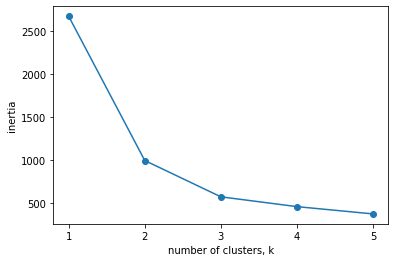

In [40]:
%pylab inline
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**Excellent work!** You can see from the graph the "best" number of clusters. Use this value for the next steps.

**Step 6:** Create a `KMeans` model called `model` with the best value from the above steps.

In [41]:
model = KMeans(n_clusters=5)

**Step 7:** Use the .fit_predict() method of model to fit it to samples and derive the cluster labels.

Calling .fit_predict() is the same as calling .fit() and then calling .predict().

In [42]:
labels = model.fit_predict(X)

In [45]:
labels

array([4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 0, 4, 4, 1, 4, 4,
       4, 1, 4, 4, 1, 1, 4, 1, 1, 3, 4, 4, 4, 4, 3, 3, 4, 0, 1, 1, 1, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       4, 4, 4, 1, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       3, 3, 3, 4, 3, 4, 4, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

**Step 8:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values.

In [44]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

NameError: name 'grain_variety' is not defined

**Step 9:** Use the `pd.crosstab()` function on `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label. Assign the result to `ct`.

In [ ]:
ct = pd.crosstab(df['labels'], df['varieties'])

**Step 10:** Display `ct` by evaluating it - and inspect your cross-tabulation!  You'll see that your clustering is pretty good.

In [ ]:
print(ct)

Now you are done. If you wish, you can also try to plot the clusters to visualize it.
